<a href="https://colab.research.google.com/github/abshilpa/Chronic-Kidney-Disease-Data-Science-Project/blob/main/CKD_Data_preprocessing_and_EDA_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading

Loads the dataset and displays its initial structure:

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# To Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# set the style of matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set()

In [ ]:
file_path = 'https://raw.githubusercontent.com/abshilpa/Chronic-Kidney-Disease-Data-Science-Project/refs/heads/main/kidney_disease.csv'
CKD_Data = pd.read_csv(file_path)

# Displaying the first few rows
CKD_Data.head()



,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# Updating column names to standard format
CKD_Data.columns = [
    'ID', 'Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
    'Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
    'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
    'Potassium', 'Hemoglobin', 'Packed Cell Volume', 'White Blood Cell Count',
    'Red Blood Cell Count', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
    'Appetite', 'Pedal Edema', 'Anemia', 'Classification'
]

CKD_Data.head()

,ID,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Exploratory Data Analysis (EDA)
The data to understand its structure, missing values, and patterns.

Overview of the Dataset

In [ ]:
# Display dataset information and summary statistics
CKD_Data.info()
CKD_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       400 non-null    int64  
 1   Age                      391 non-null    float64
 2   Blood Pressure           388 non-null    float64
 3   Specific Gravity         353 non-null    float64
 4   Albumin                  354 non-null    float64
 5   Sugar                    351 non-null    float64
 6   Red Blood Cells          248 non-null    object 
 7   Pus Cell                 335 non-null    object 
 8   Pus Cell Clumps          396 non-null    object 
 9   Bacteria                 396 non-null    object 
 10  Blood Glucose Random     356 non-null    float64
 11  Blood Urea               381 non-null    float64
 12  Serum Creatinine         383 non-null    float64
 13  Sodium                   313 non-null    float64
 14  Potassium                3

,ID,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


## Missing Values Visualization

In [ ]:
# View the missing values in CKD_Data

print("\nMissing values in CKD Dataset: ")
print(CKD_Data.isnull().sum())


Missing values in CKD Dataset: 
ID                           0
Age                          9
Blood Pressure              12
Specific Gravity            47
Albumin                     46
Sugar                       49
Red Blood Cells            152
Pus Cell                    65
Pus Cell Clumps              4
Bacteria                     4
Blood Glucose Random        44
Blood Urea                  19
Serum Creatinine            17
Sodium                      87
Potassium                   88
Hemoglobin                  52
Packed Cell Volume          70
White Blood Cell Count     105
Red Blood Cell Count       130
Hypertension                 2
Diabetes Mellitus            2
Coronary Artery Disease      2
Appetite                     1
Pedal Edema                  1
Anemia                       1
Classification               0
dtype: int64


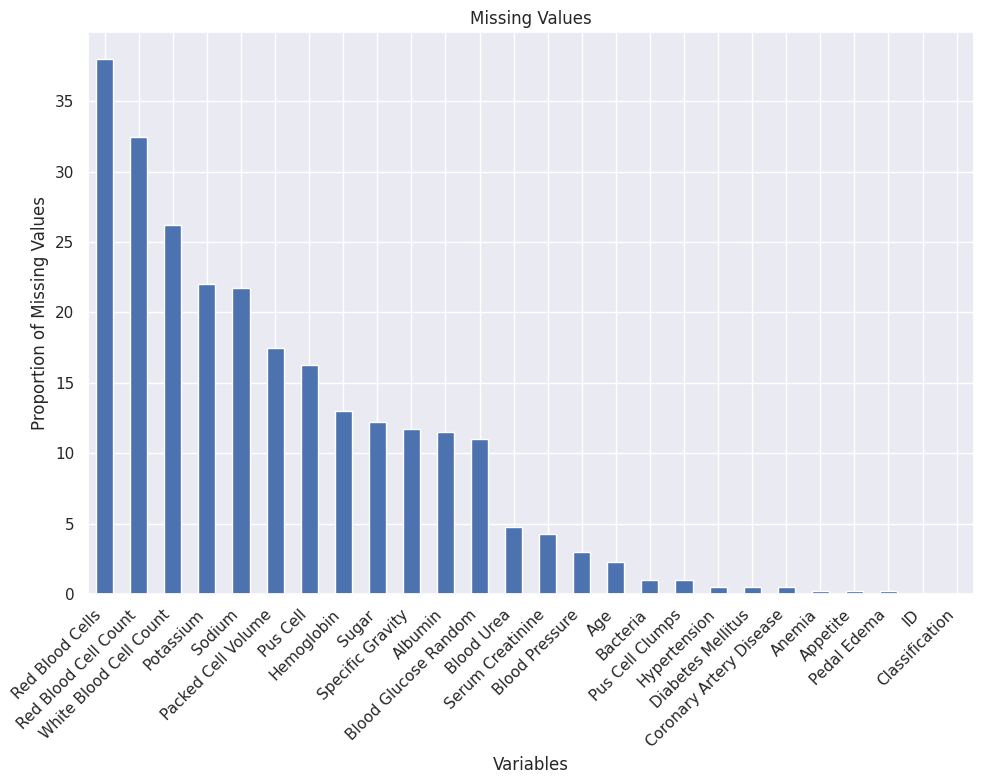

In [ ]:
# Display missing values
missing_values = (CKD_Data.isna().sum() / CKD_Data.shape[0] * 100).sort_values(ascending=False)

# Plot missing values
plt.figure(figsize=(10, 8))
missing_values.plot(kind='bar')
plt.title('Missing Values')
plt.xlabel('Variables')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Cleaning Non-Standard Values

In [ ]:
# Handle non-standard values in categorical columns
CKD_Data['Classification'] = CKD_Data['Classification'].str.replace('ckd\t', 'ckd')
CKD_Data['Diabetes Mellitus'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)
CKD_Data['Coronary Artery Disease'].replace({'\tno': 'no'}, inplace=True)


In [ ]:
# Convert object type columns to numeric where appropriate
CKD_Data['Packed Cell Volume'] = pd.to_numeric(CKD_Data['Packed Cell Volume'], errors='coerce')
CKD_Data['White Blood Cell Count'] = pd.to_numeric(CKD_Data['White Blood Cell Count'], errors='coerce')
CKD_Data['Red Blood Cell Count'] = pd.to_numeric(CKD_Data['Red Blood Cell Count'], errors='coerce')


## Class Distribution Visualization

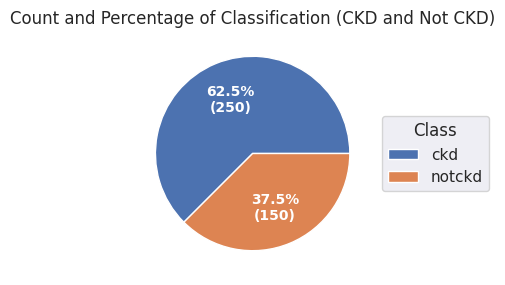

In [ ]:
# Visualize classification distribution
classification_counts = CKD_Data['Classification'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(3, 3), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(
    classification_counts.values,
    labels=classification_counts.index.values,
    autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100.*np.sum(classification_counts.values))})",
    textprops=dict(color="w"),
)
ax.legend(title="Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Count and Percentage of Classification (CKD and Not CKD)")
plt.setp(autotexts, size=10, weight="bold")
plt.show()

In [ ]:
# Separate categorical and numerical columns
cat_cols = [col for col in CKD_Data.columns if CKD_Data[col].dtype == 'object']
num_cols = [col for col in CKD_Data.columns if CKD_Data[col].dtype in ['float64', 'int64']]

print(f"\nCategorical Columns ({len(cat_cols)}): {cat_cols}")
print(f"Numerical Columns ({len(num_cols)}): {num_cols}")


Categorical Columns (11): ['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia', 'Classification']
Numerical Columns (15): ['ID', 'Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar', 'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium', 'Potassium', 'Hemoglobin', 'Packed Cell Volume', 'White Blood Cell Count', 'Red Blood Cell Count']


## Data Cleaning - handles inconsistent or missing data values.

### Missing Value Imputation

In [ ]:
#  Filling missing numeric values with median
for col in num_cols:
    CKD_Data[col].fillna(CKD_Data[col].median(), inplace=True)

# Filling missing categorical values with mode
for col in cat_cols:
    CKD_Data[col].fillna(CKD_Data[col].mode()[0], inplace=True)

In [ ]:
# Confirm missing values have been handled
print("\nMissing Values After Imputation:")
print(CKD_Data.isnull().sum())



Missing Values After Imputation:
ID                         0
Age                        0
Blood Pressure             0
Specific Gravity           0
Albumin                    0
Sugar                      0
Red Blood Cells            0
Pus Cell                   0
Pus Cell Clumps            0
Bacteria                   0
Blood Glucose Random       0
Blood Urea                 0
Serum Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed Cell Volume         0
White Blood Cell Count     0
Red Blood Cell Count       0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Pedal Edema                0
Anemia                     0
Classification             0
dtype: int64


## Data Preprocessing-This encodes categorical data, scales numerical data, and prepares the dataset for modeling.

### Label Encoding for Binary Variables

### One-Hot Encoding for Multi-Class Categorical Variables

In [ ]:
# Encode binary categorical columns
binary_cols = ['Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
               'Appetite', 'Pedal Edema', 'Anemia', 'Classification']
le = LabelEncoder()
for col in binary_cols:
    CKD_Data[col] = le.fit_transform(CKD_Data[col])


In [ ]:
# One-hot encode categorical columns with more than two categories
categorical_columns = ['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria']
CKD_Data = pd.get_dummies(CKD_Data, columns=categorical_columns, drop_first=True)


## Correlation Heatmap

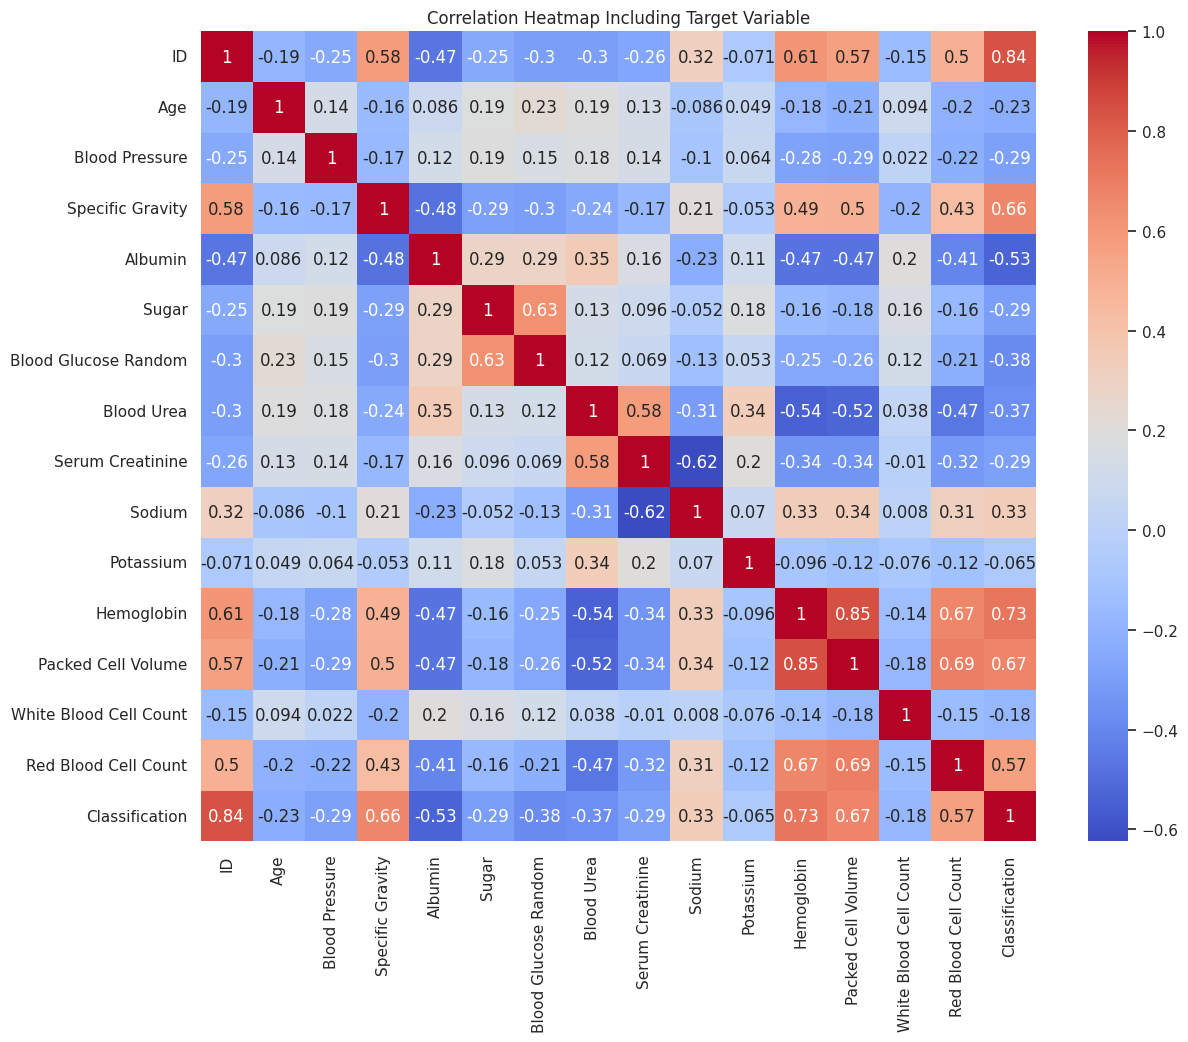

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(CKD_Data[num_cols + ['Classification']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap Including Target Variable")
plt.show()

## Scaling

In [ ]:
# Scale numerical features
scaler = StandardScaler()
CKD_Data[num_cols] = scaler.fit_transform(CKD_Data[num_cols])

In [ ]:
# Prepare data for model training
X = CKD_Data.drop(columns=['Classification'])
y = CKD_Data['Classification']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Summary statistics
print("\nSummary Statistics After Preprocessing:")
print(CKD_Data.describe())



Summary Statistics After Preprocessing:
                 ID         Age  Blood Pressure  Specific Gravity  \
count  4.000000e+02  400.000000    4.000000e+02      4.000000e+02   
mean   7.105427e-17    0.000000   -2.309264e-16      3.183231e-14   
std    1.001252e+00    1.001252    1.001252e+00      1.001252e+00   
min   -1.727726e+00   -2.922015   -1.972476e+00     -2.342354e+00   
25%   -8.638630e-01   -0.563768   -4.880162e-01     -4.997944e-01   
50%    0.000000e+00    0.202662    2.542138e-01      4.214856e-01   
75%    8.638630e-01    0.733267    2.542138e-01      4.214856e-01   
max    1.727726e+00    2.266128    7.676514e+00      1.342766e+00   

            Albumin         Sugar  Blood Glucose Random    Blood Urea  \
count  4.000000e+02  4.000000e+02            400.000000  4.000000e+02   
mean   3.552714e-17 -7.105427e-17              0.000000 -1.065814e-16   
std    1.001252e+00  1.001252e+00              1.001252  1.001252e+00   
min   -6.862436e-01 -3.802694e-01            

##  saves the preprocessed data and splits it into training and test sets.

In [ ]:
# Save preprocessed data to CSV
preprocessed_file_path = "preprocessed_data.csv"
CKD_Data.to_csv(preprocessed_file_path, index=False)
print(f"\nPreprocessed data saved to: {preprocessed_file_path}")


Preprocessed data saved to: preprocessed_data.csv


In [ ]:
# Save preprocessed data to CSV
CKD_Data.to_csv('preprocessed_data.csv', index=False)

# Load preprocessed data
preprocessed_data = pd.read_csv("/content/preprocessed_data.csv")

# Split features (X) and target (y)
X = CKD_Data.drop(columns=['Classification'])
y = CKD_Data['Classification']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train and evaluate basic machine learning models.

In [ ]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Define models
basic_models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Train and evaluate each model
for model_name, model in basic_models.items():
    print(f"\n--- {model_name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:
[[52  0]
 [ 0 28]]

--- Decision Tree ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:
[[52  0]
 [ 0 28]]

--- Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       

In [ ]:
print(f"Train and test overlap: {set(y_train) & set(y_test)}")


Train and test overlap: {0, 1}


In [ ]:
from sklearn.model_selection import cross_val_score

for model_name, model in basic_models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.2f}")


Logistic Regression Cross-Validation Accuracy: 0.99
Decision Tree Cross-Validation Accuracy: 0.90
Random Forest Cross-Validation Accuracy: 1.00
SVM Cross-Validation Accuracy: 0.99


### Hyperparameter Tuning for the Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
print("Best Decision Tree Params:", dt_grid_search.best_params_)

Best Decision Tree Params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


## Evaluating the results of ROC curve and AUC to get an idea of how well the model distinguishes between classes.

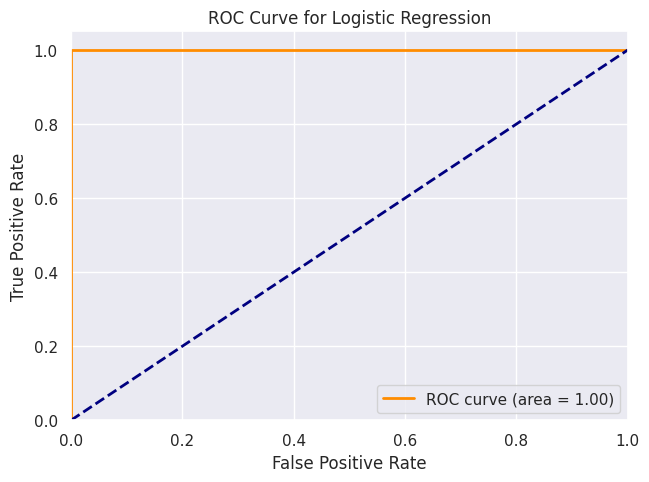

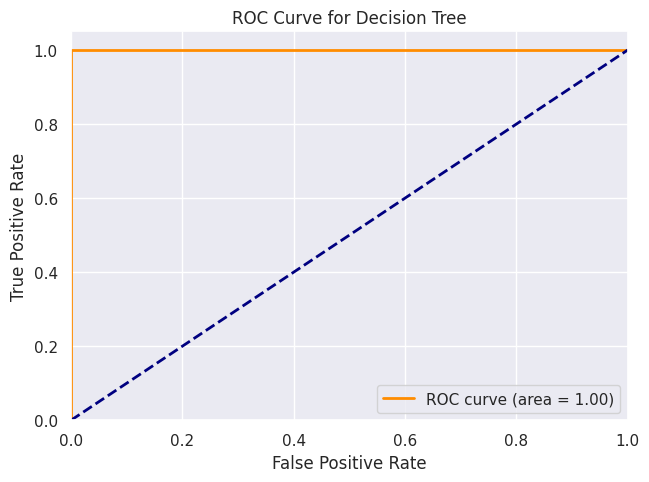

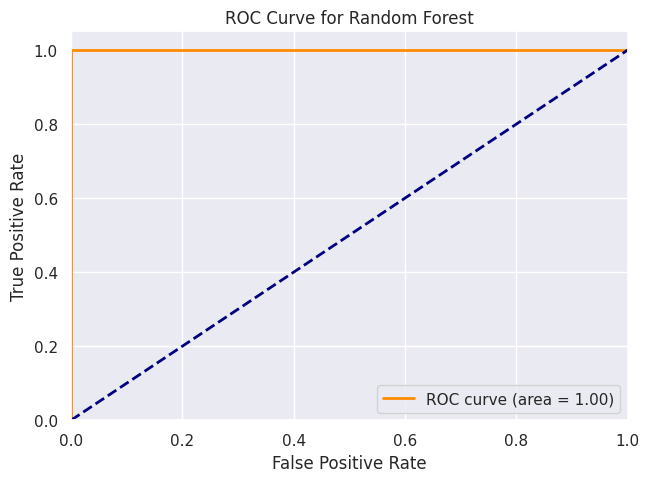

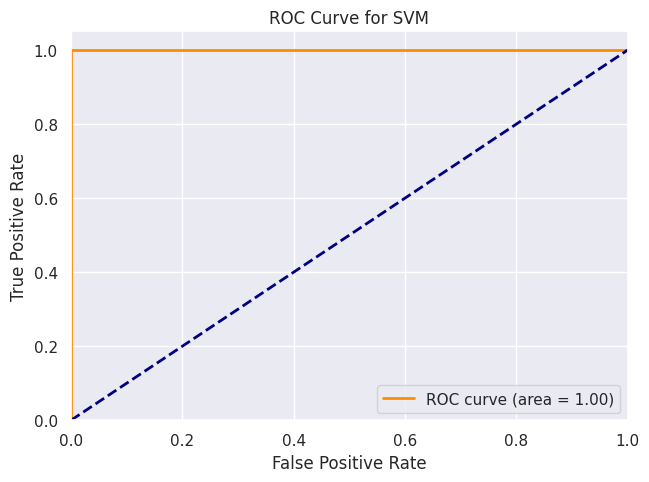

In [ ]:
from sklearn.metrics import roc_curve, auc

for model_name, model in basic_models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

## Hyperparameter Tuning with Grid Search:

### Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_rf.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 1.0


### Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Logistic Regression
logistic_regression_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']  # solvers supporting L1/L2 penalties
}

# GridSearchCV for Logistic Regression
logistic_gs = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    logistic_regression_param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the model
logistic_gs.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", logistic_gs.best_params_)
print("Best Cross-Validation Accuracy:", logistic_gs.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': None, 'solver': 'saga'}
Best Cross-Validation Accuracy: 1.0


### Support Vector Machine (SVM)

In [ ]:
# Define hyperparameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],  # only relevant for 'poly' kernel
    'gamma': ['scale', 'auto']
}

# GridSearchCV for SVM
svm_gs = GridSearchCV(
    SVC(probability=True, random_state=42),
    svm_param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the model
svm_gs.fit(X_train, y_train)
print("Best Parameters for SVM:", svm_gs.best_params_)
print("Best Cross-Validation Accuracy:", svm_gs.best_score_)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters for SVM: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 1.0


### Decision Tree

In [ ]:
# Define hyperparameter grid for Decision Tree
decision_tree_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV for Decision Tree
decision_tree_gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    decision_tree_param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the model
decision_tree_gs.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", decision_tree_gs.best_params_)
print("Best Cross-Validation Accuracy:", decision_tree_gs.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.996875


###Comparing the  Best Models Across All Algorithms

In [ ]:
# Assign the best Random Forest model from Grid Search
final_rf_model = grid_search_rf.best_estimator_

# Gather best estimators from GridSearch
best_models = {
    "Logistic Regression": logistic_gs.best_estimator_,
    "SVM": svm_gs.best_estimator_,
    "Decision Tree": decision_tree_gs.best_estimator_,
    "Random Forest": final_rf_model
}
# Evaluate each model on the test set
for model_name, model in best_models.items():
    print(f"\n--- {model_name} ---")
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:
[[52  0]
 [ 0 28]]

--- SVM ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:
[[52  0]
 [ 0 28]]

--- Decision Tree ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      

### Feature importance is only applicable to tree-based models like Decision Tree and Random Forest. For non-tree models like SVM, Logistic regression (coefficients or support vectors) can be analyzed.

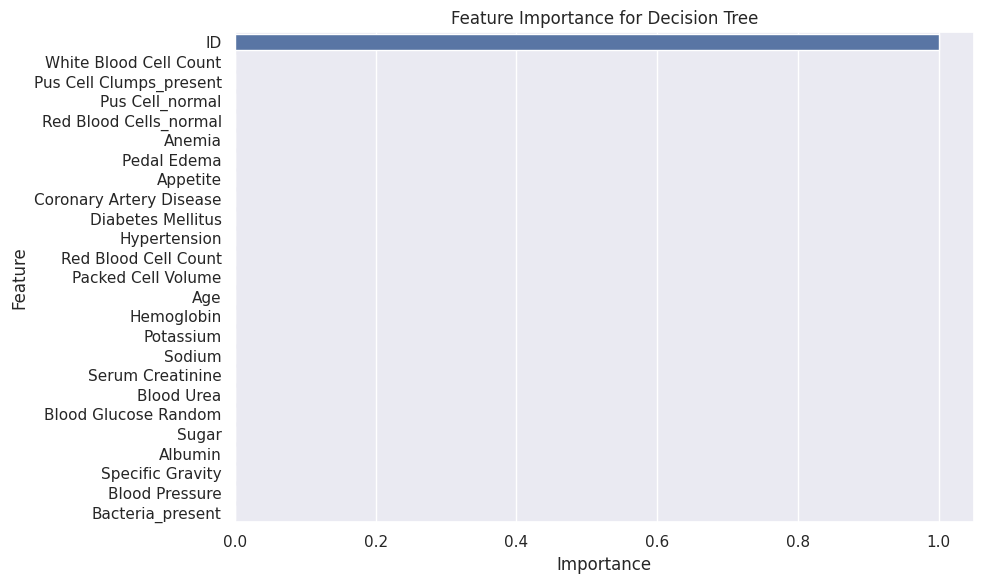

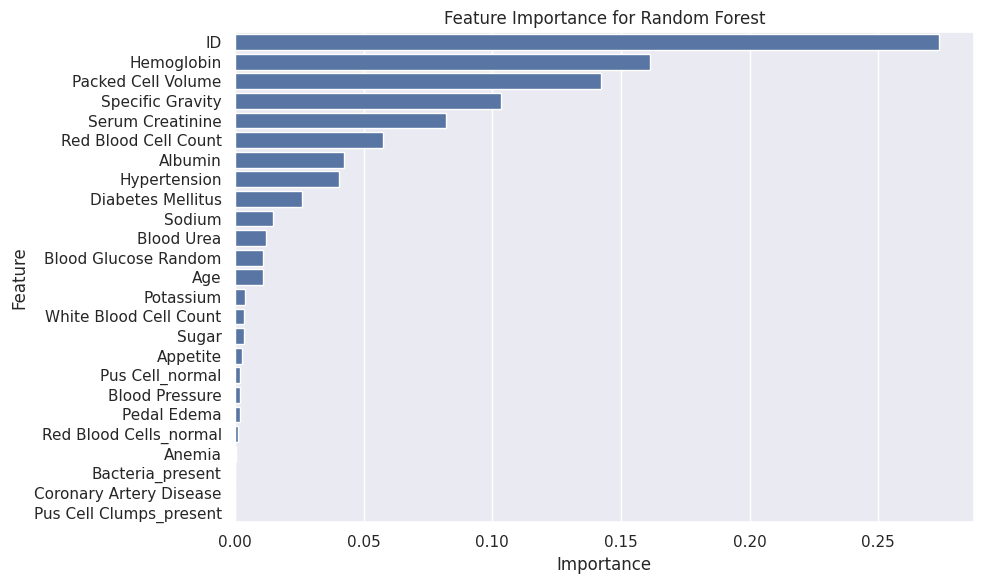

In [ ]:
# Feature importance for Decision Tree and Random Forest
for model_name in ["Decision Tree", "Random Forest"]:
    if model_name in best_models:
        model = best_models[model_name]
        importances = model.feature_importances_
        feature_importances = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importances)
        plt.title(f'Feature Importance for {model_name}')
        plt.tight_layout()
        plt.show()

In [ ]:
# Dictionary of models to compare
models_to_compare = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Final Random Forest": final_rf_model
}

for model_name, model in models_to_compare.items():
    if model_name != "Final Random Forest":
        model.fit(X_train, y_train)  # Train other models
    y_pred = model.predict(X_test)
    print(f"\n--- {model_name} ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


--- Decision Tree ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


--- SVM ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00     

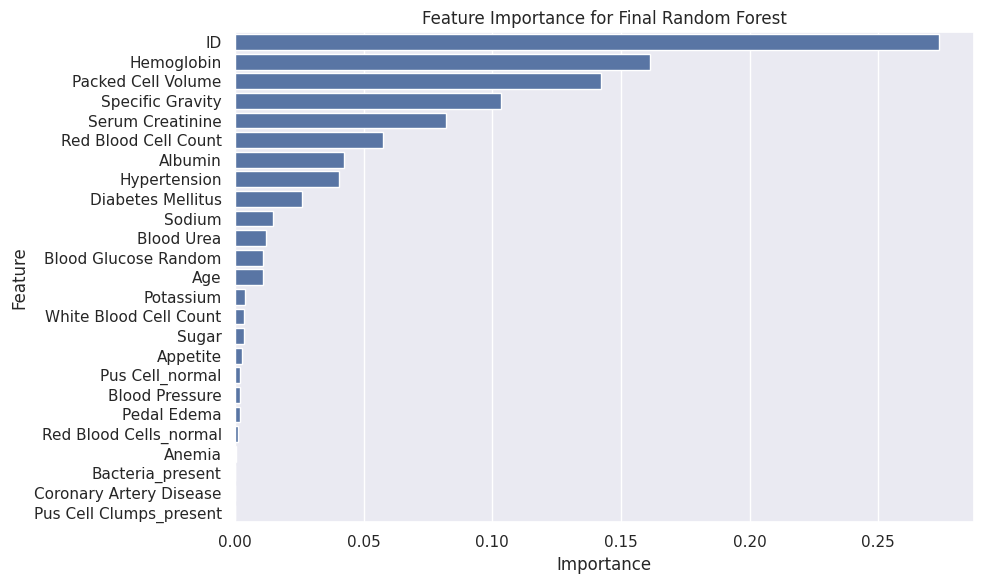

In [ ]:
# Feature Importance for Final Random Forest
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance for Final Random Forest')
plt.tight_layout()
plt.show()


## Logistic Regression Feature Coefficients:

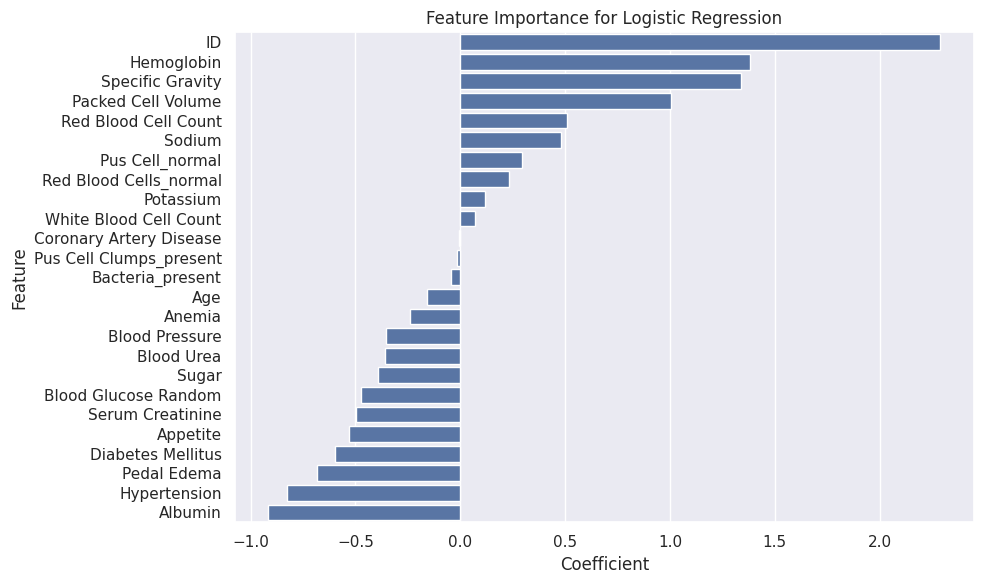

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Get coefficients (feature importance)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance for Logistic Regression')
plt.tight_layout()
plt.show()


## Evaluate Model Robustness(Cross-Validation and Evaluation Metrics)

## Cross-Validation for Robustness:

In [ ]:
from sklearn.model_selection import cross_val_score

# Logistic Regression cross-validation score
logreg_cv_score = cross_val_score(LogisticRegression(random_state=42), X, y, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy:", logreg_cv_score.mean())



Logistic Regression Cross-Validation Accuracy: 0.9925


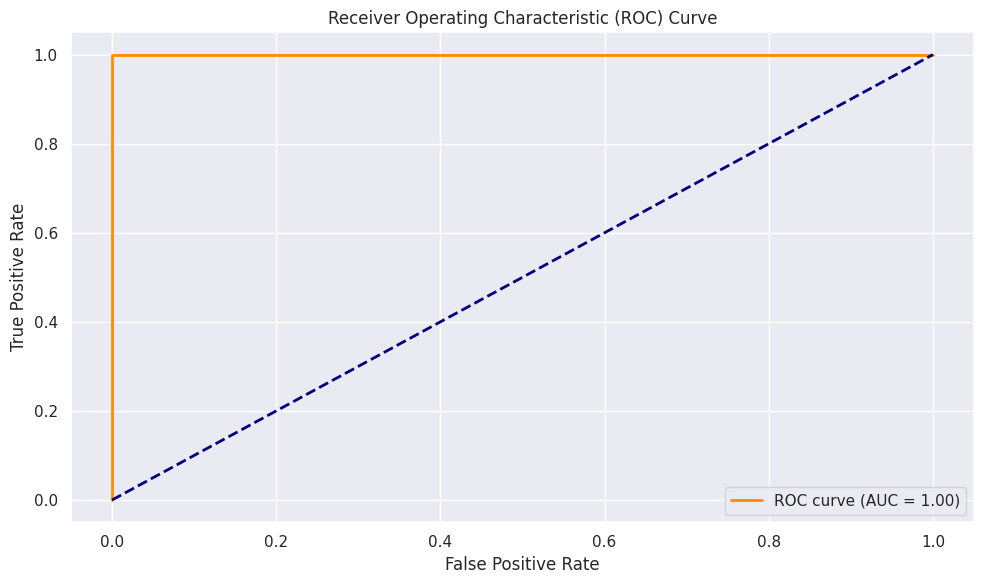

In [ ]:
# ROC Curve & AUC:

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict

# Cross-validation for SVM
y_pred_prob = cross_val_predict(SVC(probability=True, random_state=42), X, y, cv=5, method='predict_proba')

# Get ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:, 1])
roc_auc = roc_auc_score(y, y_pred_prob[:, 1])

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



## VIF (Variance Inflation Factor)
Variance Inflation Factor (VIF) helps identify multicollinearity between features. High VIF values (above 5 or 10) suggest that the features are highly correlated and might need to be dropped or combined.

In [ ]:
#Check for Multicollinearity Using VIF (Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant term (intercept) to the features
X_const = add_constant(X_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Display VIF values
print(vif_data)

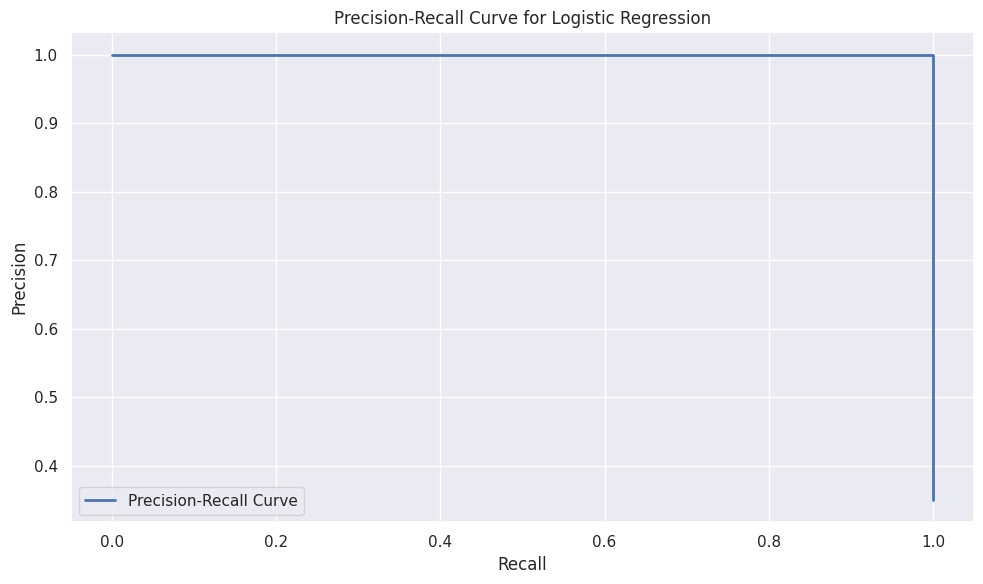

In [ ]:
from sklearn.metrics import precision_recall_curve

# For Logistic Regression
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_logreg)

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
